<a href="https://colab.research.google.com/github/lizzy0ne/Recommendation-system/blob/init/SVDreco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd

In [29]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

Creating user-movie matrix to implement SVD. Sparse matrix is filled with 0 if there is no rating.

In [30]:
merged_df = pd.merge(ratings, movies, on='movieId')
user_movie_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)
user_movie_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


Creating sample test data, by sampling 200 ratings from user-movie rating matrix and removing those ratings for evaluation purposes.

In [31]:
sampled_ratings = user_movie_matrix.sample(n=200, replace=False, random_state=42)

# Remove the sampled ratings from the original matrix
test_data = user_movie_matrix.copy()
test_data.loc[sampled_ratings.index] = 0  # Set sampled ratings to 0

# Display the sampled ratings (test data)
print("Sampled Ratings (Test Data):")
print(sampled_ratings)

# Display the modified matrix (original matrix with sampled ratings removed)
print("\nModified User-Movie Rating Matrix (Original Matrix with Sampled Ratings Removed):")
print(test_data)

Sampled Ratings (Test Data):
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
82          2.5     3.0     0.0     0.0     0.0     3.5     0.0       0   
219         3.5     2.5     0.0     0.0     0.0     3.5     0.0       0   
56          0.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
599         3.0     2.5     1.5     0.0     0.0     4.5     2.5       0   
265         0.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
469         4.0     0.0     0.0     0.0     0.0     3.0     0.0       0   
523         0.0     4.5     0.0     0.0     0.0     0.0     0.0       0   
299         0.0     3.0     0.0     0.0     0.0     0.0     0.0       0   
471         5.0     0.0     0.0     0.0     0.0     0.0     0.0       0   
272         0.0     0.0     0.0     0.0     0.0     0.0     0.0       0

Decomposition using SVD. A = U*Sigma*V where

1) U represents the user matrix.
Each row of  U corresponds to a user, column - latent factors or features that describe users' preferences or characteristics.

2) Σ is a diagonal matrix containing singular values.
In the context of movie ratings, singular values represent the importance of each latent factor in explaining the variability in ratings across users and movies.

3) V represents the transposed movie matrix.
Each column of V corresponds to a movie, rows - represent latent factors or features that describe movies.The values in V indicate how much each movie is associated with each latent factor.

Latent factors are hidden characteristics or features that capture aspects of users' preferences and items' characteristics in a recommendation system. They are inferred from the patterns present in the data and play a crucial role in making accurate and personalized recommendations.

In [24]:
user_movie_train_array = test_data.to_numpy()
U, sigma, V_transpose = np.linalg.svd(user_movie_train_array, full_matrices=False)

U_df = pd.DataFrame(U, columns=[f"LatentFactor_{i}" for i in range(U.shape[1])])
# Display the DataFrame with latent factors as column names
print(U_df.head())

print("\nSigma (Singular Values):")
print(sigma[:5])  # Display first 5 singular values

print("\nV_transpose (Transposed Movie Matrix):")
print(V_transpose[:5, :])  # Display first 5 rows of V_transpose


   LatentFactor_0  LatentFactor_1  LatentFactor_2  LatentFactor_3  \
0   -2.220446e-16   -3.053113e-16    2.220446e-16    2.081668e-17   
1   -7.535000e-03   -2.399336e-02   -8.066128e-03   -1.411895e-02   
2    0.000000e+00    5.551115e-17    2.220446e-16   -6.245005e-17   
3   -4.216191e-02    6.259320e-02    2.446478e-02   -6.281035e-02   
4   -1.577281e-02    3.623991e-02   -5.082378e-02    1.398225e-02   

   LatentFactor_4  LatentFactor_5  LatentFactor_6  LatentFactor_7  \
0   -1.040834e-17   -8.326673e-17    1.040834e-16    6.938894e-17   
1    2.270780e-02   -1.442317e-02    4.303962e-03    2.689112e-03   
2   -3.122502e-17    0.000000e+00    2.428613e-17    1.387779e-17   
3   -2.432749e-02   -7.087062e-03    7.134860e-03    4.013650e-03   
4    3.854363e-02   -3.246841e-03   -2.133287e-02   -1.323434e-02   

   LatentFactor_8  LatentFactor_9  ...  LatentFactor_600  LatentFactor_601  \
0    3.885781e-16   -4.302114e-16  ...     -1.709764e-33      1.467847e-33   
1    5.471339e

After obtaning vectors, we may reconstruct original matrix to make predictions

   Actual Ratings  Predicted Ratings
0             2.5           2.031699
1             3.0           1.585341
2             3.5           1.180779
3             3.5           2.202952
4             2.0           1.438614
k: 10; RMSE: 2.324629844790525
   Actual Ratings  Predicted Ratings
0             2.5           1.862744
1             3.0           1.254544
2             3.5           1.426757
3             3.5           2.761919
4             2.0           1.175655
k: 30; RMSE: 1.7762109229739655
   Actual Ratings  Predicted Ratings
0             2.5           2.051180
1             3.0           2.143733
2             3.5           1.967355
3             3.5           3.771030
4             2.0           1.164871
k: 50; RMSE: 1.4139791395954813
   Actual Ratings  Predicted Ratings
0             2.5           2.316215
1             3.0           2.894523
2             3.5           2.942904
3             3.5           3.618903
4             2.0           1.916782
k: 70; RMSE: 1.13

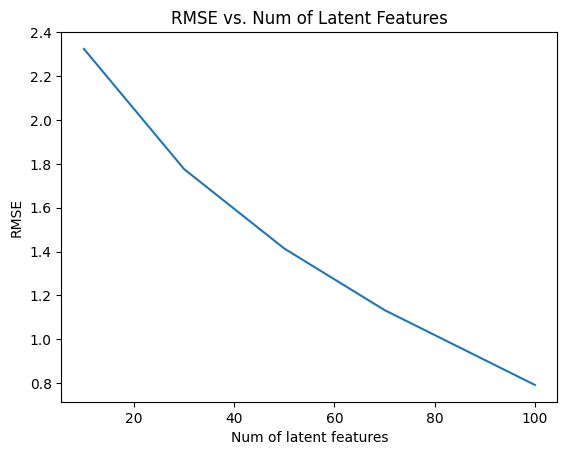

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error

def printRMSEGraph(kArr, RMSEArr):
    plt.plot(kArr, RMSEArr)
    plt.xlabel("Num of latent features")
    plt.ylabel("RMSE")
    plt.title("RMSE vs. Num of Latent Features")
    plt.show()

def svdPrediction(train_data, test_data, kArr):
    rmses = []
    for k in kArr:
        U, sigma, Vt = svds(train_data, k=k)
        sigma = np.diag(sigma)
        predicted_ratings = np.dot(np.dot(U, sigma), Vt)

        #RMSE, actual values from sample vs predicted
        missing_indices = np.where(test_data.values != 0)
        actual_ratings = test_data.values[missing_indices]
        predicted_ratings = predicted_ratings[missing_indices]
        rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

        ratings_comparison = pd.DataFrame({
            'Actual Ratings': actual_ratings,
            'Predicted Ratings': predicted_ratings
        })

        print(ratings_comparison.head())

        rmses.append(rmse)
        print(f"k: {k}; RMSE: {rmse}")
    return rmses


kArr = [10, 30, 50, 70, 100]
train_data = test_data.to_numpy()
test_data = sampled_ratings
RMSEArr = svdPrediction(train_data, test_data, kArr)
printRMSEGraph(kArr, RMSEArr)


The graph represents the relationship between the number of latent features (k) used in the Singular Value Decomposition (SVD) model and the Root Mean Squared Error (RMSE) of the predictions made by the model.